In [151]:
import pandas as pd
import pygwalker as pyg

df = pd.read_csv('../data/history.csv')

df.head()

,url,watch_timestamp,video_id,fulltitle,thumbnail,description,channel_id,duration,view_count,age_limit,categories,tags,live_status,release_timestamp,comment_count,heatmap,like_count,channel,channel_follower_count,channel_is_verified
0,https://www.youtube.com/watch?v=9laxZX_39TM,1722120597,9laxZX_39TM,Craziest Road Rage Moments of ALL TIME..,https://i.ytimg.com/vi/9laxZX_39TM/maxresdefau...,"Road rage can be incredibly dangerous, especia...",UCjnYCUIym8wNRjLtZCc6gNg,2078,744060,0,Entertainment,NaN,not_live,1718652402,1300.0,"[{""start_time"": 0.0, ""end_time"": 20.78, ""value...",8740.0,Dr Insanity,1340000.0,True
1,https://www.youtube.com/watch?v=L6Igs5d-cbs,1722123983,L6Igs5d-cbs,Cops Make the Worst Discovery of Their Lives,https://i.ytimg.com/vi_webp/L6Igs5d-cbs/maxres...,"In today's true crime documentary, we're cover...",UCJWKjrrUh2KL1d3zXQW79cQ,3823,8756017,0,Entertainment,"documentary, true crime documentary, news, jou...",not_live,1718661219,14000.0,"[{""start_time"": 0.0, ""end_time"": 38.23, ""value...",135413.0,EXPLORE WITH US,5470000.0,True
2,https://www.youtube.com/watch?v=FPkgsy9HgLU,1722122331,FPkgsy9HgLU,When Cops Almost Dìed Saving People,https://i.ytimg.com/vi/FPkgsy9HgLU/sddefault.jpg,What happens when cops think its their last mo...,UC-kc7_m0l9Wkm_c3saiWpiQ,1149,1895192,0,People & Blogs,NaN,not_live,1718980441,1200.0,"[{""start_time"": 0.0, ""end_time"": 11.49, ""value...",43787.0,Inspector Ray,179000.0,NaN
3,https://www.youtube.com/watch?v=DfbLSl4X_8M,1722207960,DfbLSl4X_8M,Une journée avec des pompiers !,https://i.ytimg.com/vi_webp/DfbLSl4X_8M/maxres...,Dans cet épisode on va découvrir ensemble l'en...,UCj--qtjUrXbWABX-KWLRu9A,2134,102321,0,Entertainment,NaN,not_live,1722182419,136.0,NaN,5028.0,Ludovic B,405000.0,True
4,https://www.youtube.com/watch?v=VP9vAssEeyQ,1722122280,VP9vAssEeyQ,Emotional Moments Caught On Bodycam,https://i.ytimg.com/vi_webp/VP9vAssEeyQ/maxres...,We found the most emotional moments in bodycam...,UCd144CEyW2uGQa2U6Olc02w,1936,3069166,0,People & Blogs,NaN,not_live,1716305231,2800.0,"[{""start_time"": 0.0, ""end_time"": 19.36, ""value...",61159.0,Witness,18100.0,NaN


In [152]:
# prepare the data
# convert the timestamp to datetime
df['watch_timestamp'] = pd.to_datetime(df['watch_timestamp'], unit='s')
df['release_timestamp'] = pd.to_datetime(df['release_timestamp'], unit='s')

# convert the tags to array, can be null
df['tags'] = df['tags'].apply(lambda x: x.split(',') if type(x) == str else [])

# convert the categories to array, can be null
df['categories'] = df['categories'].apply(lambda x: x.split(',') if type(x) == str else [])

# convert channel_is_verified to boolean, can be null

df['channel_is_verified'] = df['channel_is_verified'].apply(lambda x: x == True)

df.head()

,url,watch_timestamp,video_id,fulltitle,thumbnail,description,channel_id,duration,view_count,age_limit,categories,tags,live_status,release_timestamp,comment_count,heatmap,like_count,channel,channel_follower_count,channel_is_verified
0,https://www.youtube.com/watch?v=9laxZX_39TM,2024-07-27 22:49:57,9laxZX_39TM,Craziest Road Rage Moments of ALL TIME..,https://i.ytimg.com/vi/9laxZX_39TM/maxresdefau...,"Road rage can be incredibly dangerous, especia...",UCjnYCUIym8wNRjLtZCc6gNg,2078,744060,0,[Entertainment],[],not_live,2024-06-17 19:26:42,1300.0,"[{""start_time"": 0.0, ""end_time"": 20.78, ""value...",8740.0,Dr Insanity,1340000.0,True
1,https://www.youtube.com/watch?v=L6Igs5d-cbs,2024-07-27 23:46:23,L6Igs5d-cbs,Cops Make the Worst Discovery of Their Lives,https://i.ytimg.com/vi_webp/L6Igs5d-cbs/maxres...,"In today's true crime documentary, we're cover...",UCJWKjrrUh2KL1d3zXQW79cQ,3823,8756017,0,[Entertainment],"[documentary, true crime documentary, news, ...",not_live,2024-06-17 21:53:39,14000.0,"[{""start_time"": 0.0, ""end_time"": 38.23, ""value...",135413.0,EXPLORE WITH US,5470000.0,True
2,https://www.youtube.com/watch?v=FPkgsy9HgLU,2024-07-27 23:18:51,FPkgsy9HgLU,When Cops Almost Dìed Saving People,https://i.ytimg.com/vi/FPkgsy9HgLU/sddefault.jpg,What happens when cops think its their last mo...,UC-kc7_m0l9Wkm_c3saiWpiQ,1149,1895192,0,[People & Blogs],[],not_live,2024-06-21 14:34:01,1200.0,"[{""start_time"": 0.0, ""end_time"": 11.49, ""value...",43787.0,Inspector Ray,179000.0,False
3,https://www.youtube.com/watch?v=DfbLSl4X_8M,2024-07-28 23:06:00,DfbLSl4X_8M,Une journée avec des pompiers !,https://i.ytimg.com/vi_webp/DfbLSl4X_8M/maxres...,Dans cet épisode on va découvrir ensemble l'en...,UCj--qtjUrXbWABX-KWLRu9A,2134,102321,0,[Entertainment],[],not_live,2024-07-28 16:00:19,136.0,NaN,5028.0,Ludovic B,405000.0,True
4,https://www.youtube.com/watch?v=VP9vAssEeyQ,2024-07-27 23:18:00,VP9vAssEeyQ,Emotional Moments Caught On Bodycam,https://i.ytimg.com/vi_webp/VP9vAssEeyQ/maxres...,We found the most emotional moments in bodycam...,UCd144CEyW2uGQa2U6Olc02w,1936,3069166,0,[People & Blogs],[],not_live,2024-05-21 15:27:11,2800.0,"[{""start_time"": 0.0, ""end_time"": 19.36, ""value...",61159.0,Witness,18100.0,False


In [153]:
walker = pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ee3d62e2f4dfPu7AQOtnRrxaVMm" style="height: auto">\n    <hea…

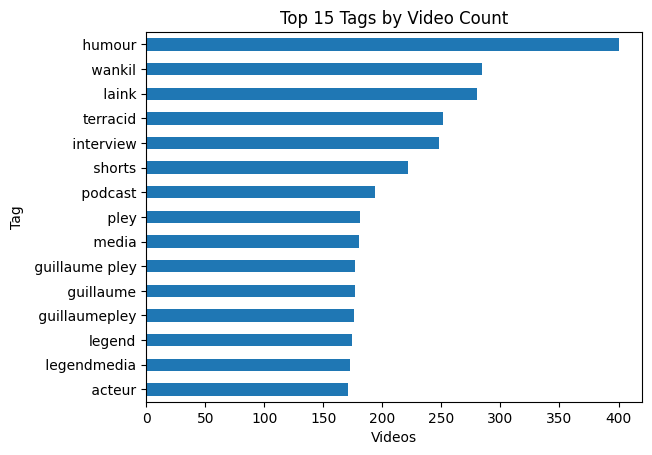

In [154]:
import matplotlib.pyplot as plt

df_tags = df.explode('tags')

df_tags['tags'].value_counts().head(15).sort_values().plot(kind='barh')

plt.xlabel('Videos')
plt.ylabel('Tag')
plt.title('Top 15 Tags by Video Count')

plt.show()

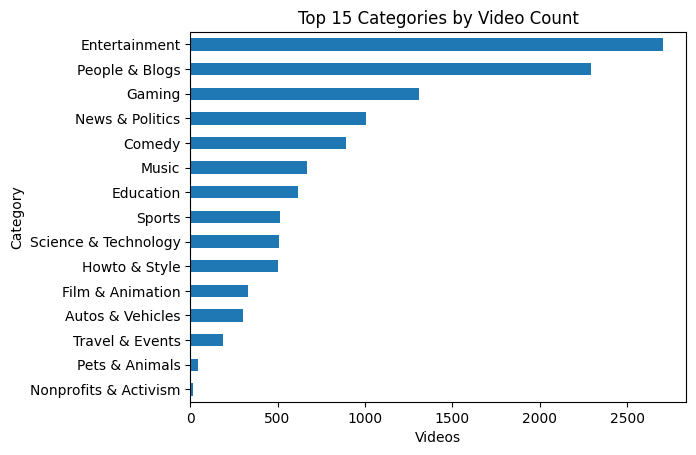

In [155]:
df_categories = df.explode('categories')

df_categories['categories'].value_counts().head(15).sort_values().plot(kind='barh')

plt.xlabel('Videos')
plt.ylabel('Category')
plt.title('Top 15 Categories by Video Count')

plt.show()

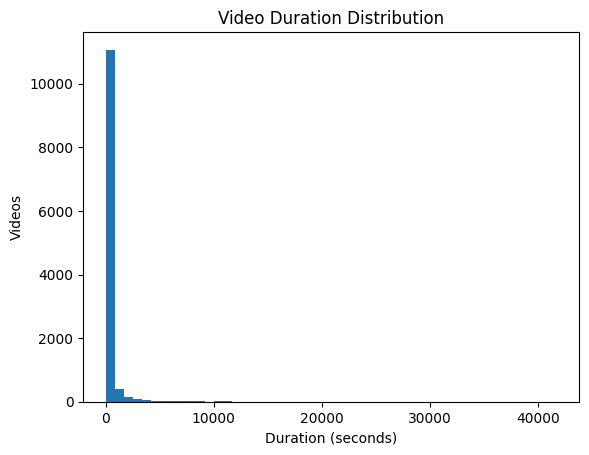

In [156]:
df['duration'].plot(kind='hist', bins=50)

plt.xlabel('Duration (seconds)')
plt.ylabel('Videos')
plt.title('Video Duration Distribution')

plt.show()

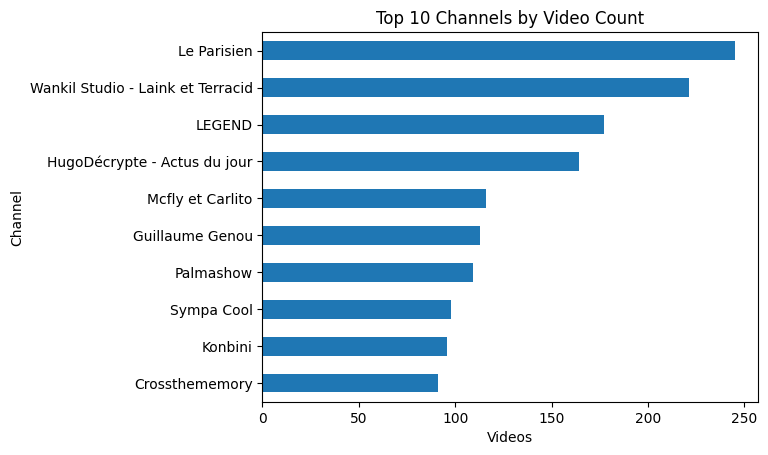

In [157]:
# show the top 10 channels

df['channel'].value_counts().head(10).sort_values().plot(kind='barh')

plt.xlabel('Videos')
plt.ylabel('Channel')
plt.title('Top 10 Channels by Video Count')

plt.show()

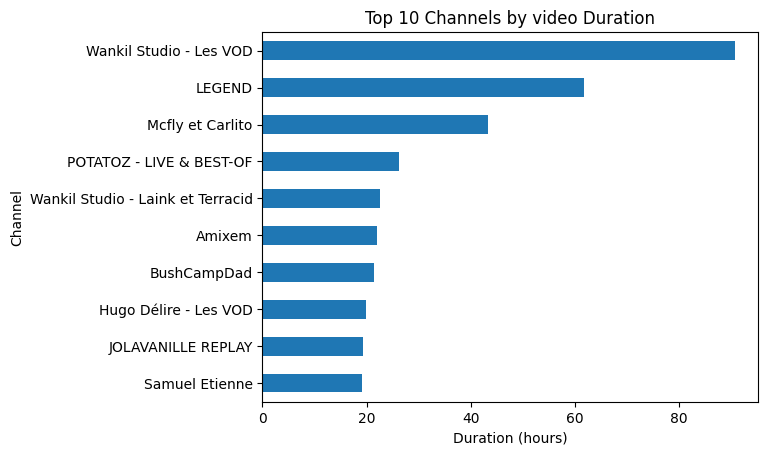

In [158]:
# show the top 10 channels by duration

df.groupby('channel')['duration'].sum().sort_values(ascending=False).head(10).apply(lambda x: x / 3600).sort_values().plot(kind='barh')

plt.xlabel('Duration (hours)')
plt.ylabel('Channel')
plt.title('Top 10 Channels by video Duration')

plt.show()

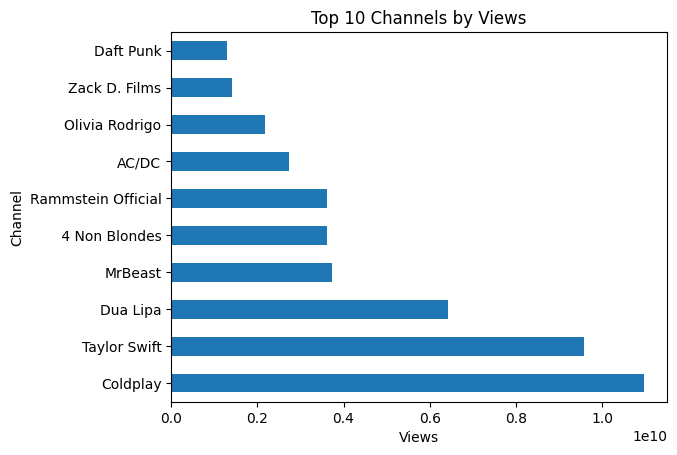

In [159]:
# show the top 10 channels by views

df.groupby('channel')['view_count'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

plt.xlabel('Views')
plt.ylabel('Channel')
plt.title('Top 10 Channels by Views')

plt.show()

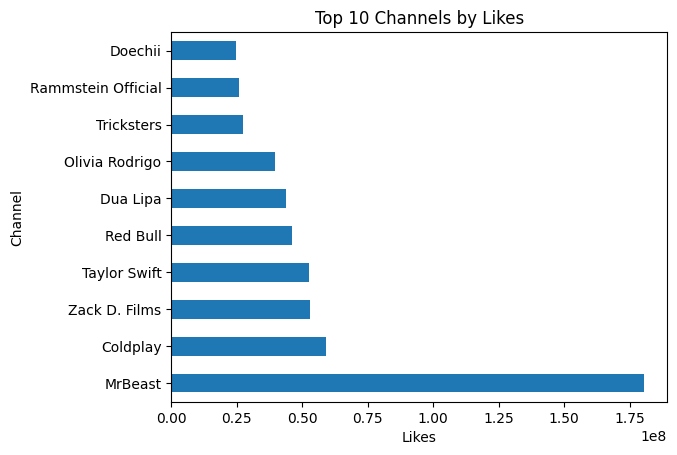

In [160]:
# show the top 10 channels by likes

df.groupby('channel')['like_count'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

plt.xlabel('Likes')
plt.ylabel('Channel')
plt.title('Top 10 Channels by Likes')

plt.show()

Text(0.5, 1.0, 'Top 10 Channels by Subscribers')

C:\Users\loloi\PycharmProjects\ytb-watch-history-visualization\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\loloi\PycharmProjects\ytb-watch-history-visualization\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12387 (\N{HIRAGANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\loloi\PycharmProjects\ytb-watch-history-visualization\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12379 (\N{HIRAGANA LETTER SE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\loloi\PycharmProjects\ytb-watch-history-visualization\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\loloi\PycharmProjects\ytb-watch-history-visualization\.venv\Lib\site-package

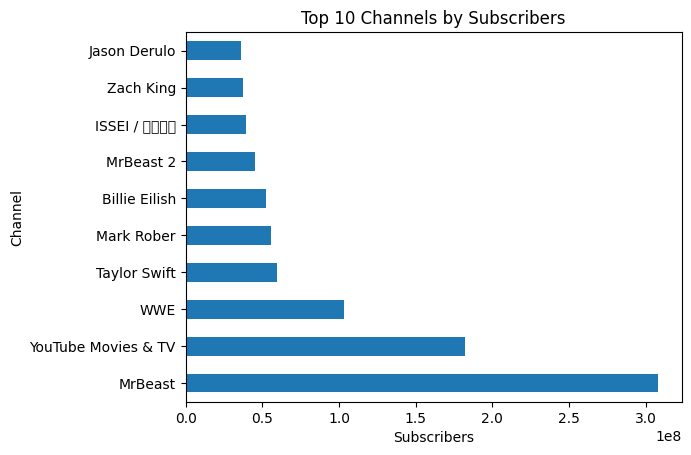

In [161]:
# show the top 10 channels by subscribers

df.groupby('channel')['channel_follower_count'].max().sort_values(ascending=False).head(10).plot(kind='barh')

plt.xlabel('Subscribers')
plt.ylabel('Channel')
plt.title('Top 10 Channels by Subscribers')

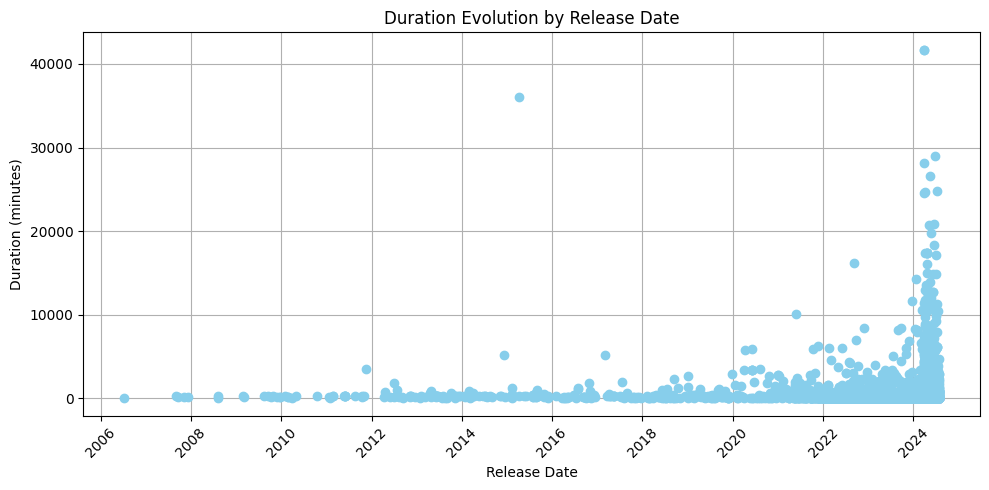

In [162]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['release_timestamp'], df['duration'], marker='o', linestyle='', color='skyblue')

plt.xlabel('Release Date')
plt.ylabel('Duration (minutes)')
plt.title('Duration Evolution by Release Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

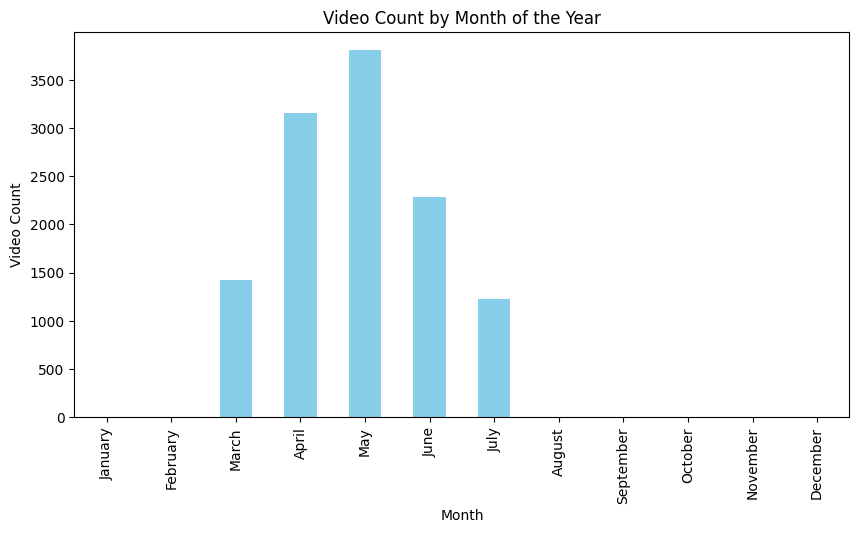

In [163]:
# Extract month from the timestamp
df['month'] = df['watch_timestamp'].dt.month_name()

# Count the number of videos per month
video_counts = df['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], fill_value=0)

# Plotting
plt.figure(figsize=(10, 5))
video_counts.plot(kind='bar', color='skyblue')

# Set the x-axis labels manually
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.xlabel('Month')
plt.ylabel('Video Count')
plt.title('Video Count by Month of the Year')
plt.show()


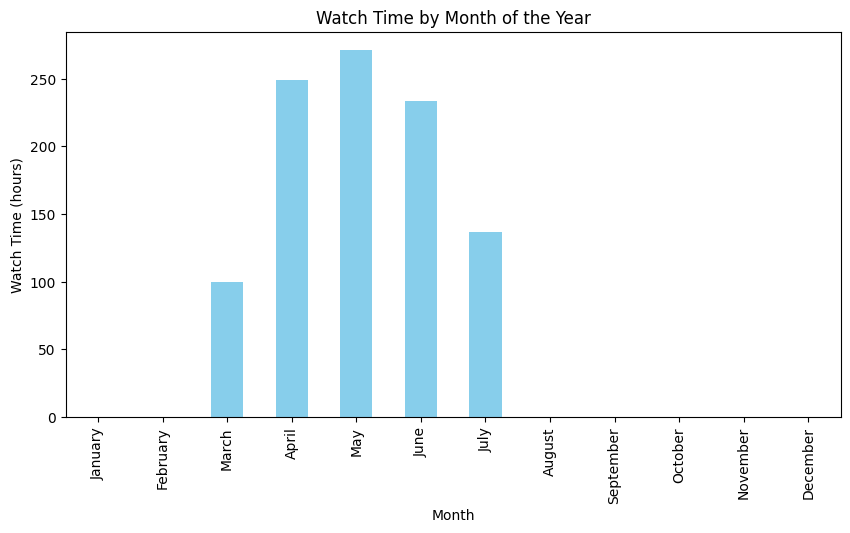

In [164]:
# watch time evolution by month

# Extract month from the timestamp
df['month'] = df['watch_timestamp'].dt.month_name()

# Group by month and sum the duration
watch_time = df.groupby('month')['duration'].sum().apply(lambda x: x / 3600).reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], fill_value=0)

# Plotting
plt.figure(figsize=(10, 5))
watch_time.plot(kind='bar', color='skyblue')

# Set the x-axis labels manually
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.xlabel('Month')
plt.ylabel('Watch Time (hours)')
plt.title('Watch Time by Month of the Year')
plt.show()

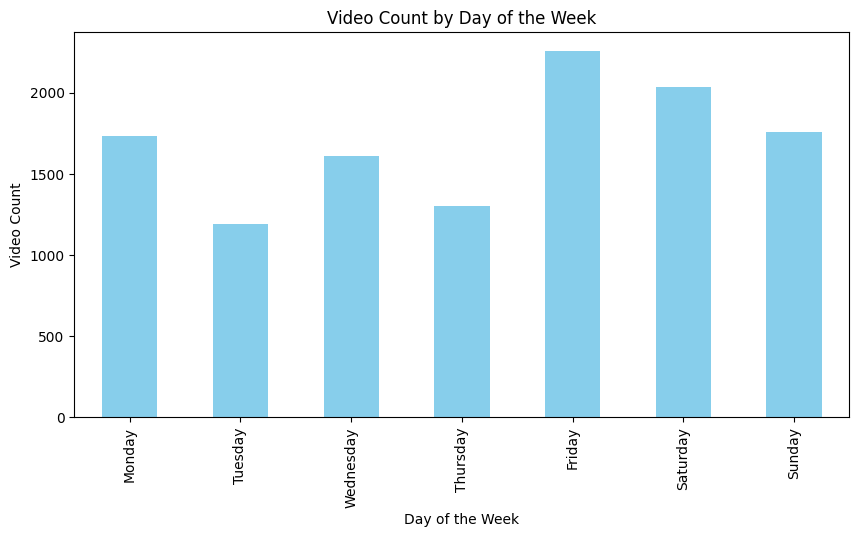

In [165]:
# number of videos watched by day of the week

# Extract day of the week from the timestamp
df['day_of_week'] = df['watch_timestamp'].dt.day_name()

# Count the number of videos per day of the week
video_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], fill_value=0)

# Plotting
plt.figure(figsize=(10, 5))
video_counts.plot(kind='bar', color='skyblue')

# Set the x-axis labels manually
plt.xticks(ticks=range(7), labels=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.xlabel('Day of the Week')
plt.ylabel('Video Count')
plt.title('Video Count by Day of the Week')
plt.show()

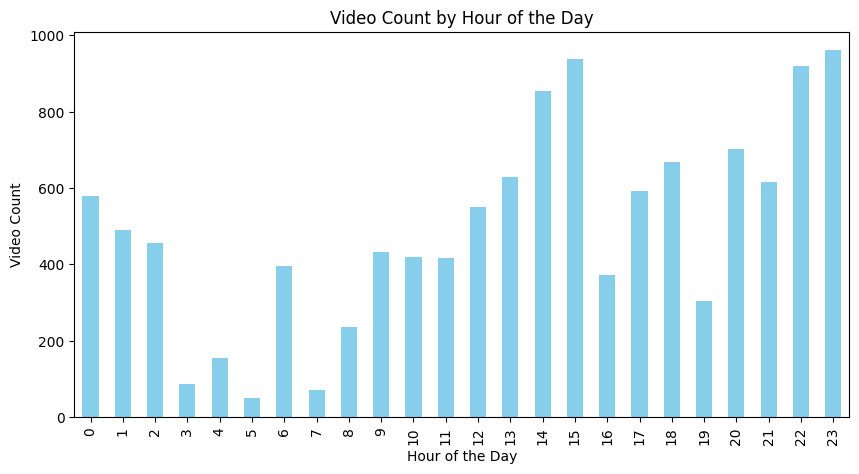

In [166]:
# Videos watched by hour of the day

# Extract hour of the day from the timestamp
df['hour'] = df['watch_timestamp'].dt.hour

# Count the number of videos per hour of the day
video_counts = df['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
video_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Hour of the Day')
plt.ylabel('Video Count')
plt.title('Video Count by Hour of the Day')
plt.show()

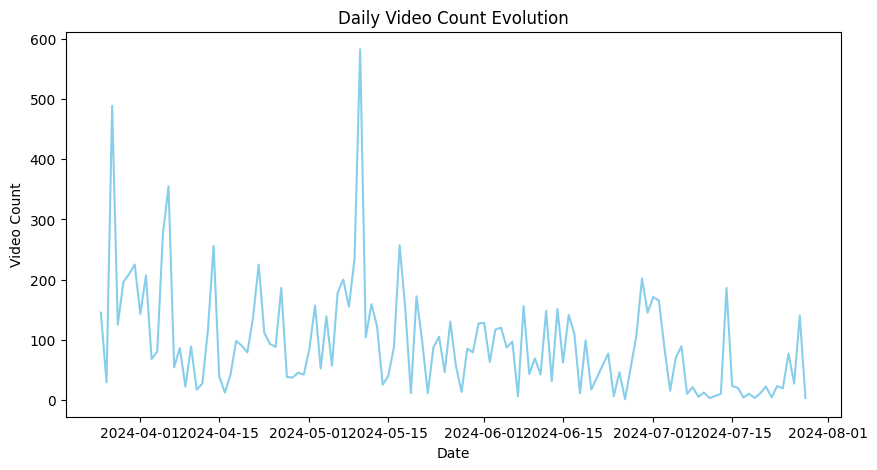

In [167]:
# videos watched daily evolution over time

# Extract date from the timestamp
df['date'] = df['watch_timestamp'].dt.date

# Count the number of videos per date
video_counts = df['date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
video_counts.plot(color='skyblue')

plt.xlabel('Date')
plt.ylabel('Video Count')
plt.title('Daily Video Count Evolution')
plt.show()

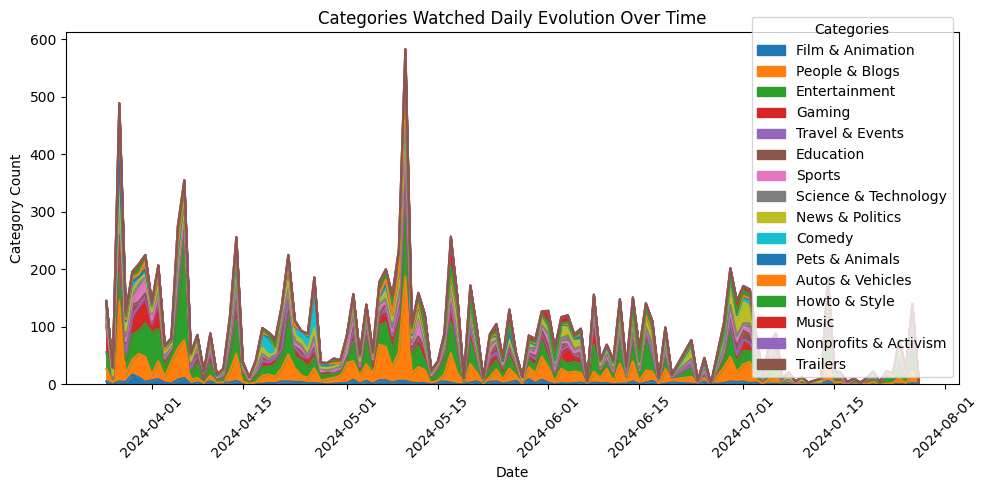

In [168]:
from collections import Counter

# Read the data into a pandas DataFrame

# Function to count categories
def count_categories(categories_list):
    return Counter([category for sublist in categories_list for category in sublist])



# Aggregate the category counts by date
df_agg = df.groupby('date')['categories'].apply(lambda x: sum(x, [])).reset_index()

# Create a DataFrame with one column per category, filling NaNs with zeros
df_agg_expanded = df_agg['categories'].apply(Counter).apply(pd.Series).fillna(0).set_index(df_agg['date'])

# Plotting
plt.figure(figsize=(10, 5))
df_agg_expanded.plot(kind='area', stacked=True, ax=plt.gca())

plt.xlabel('Date')
plt.ylabel('Category Count')
plt.title('Categories Watched Daily Evolution Over Time')
plt.legend(title='Categories')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loloi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


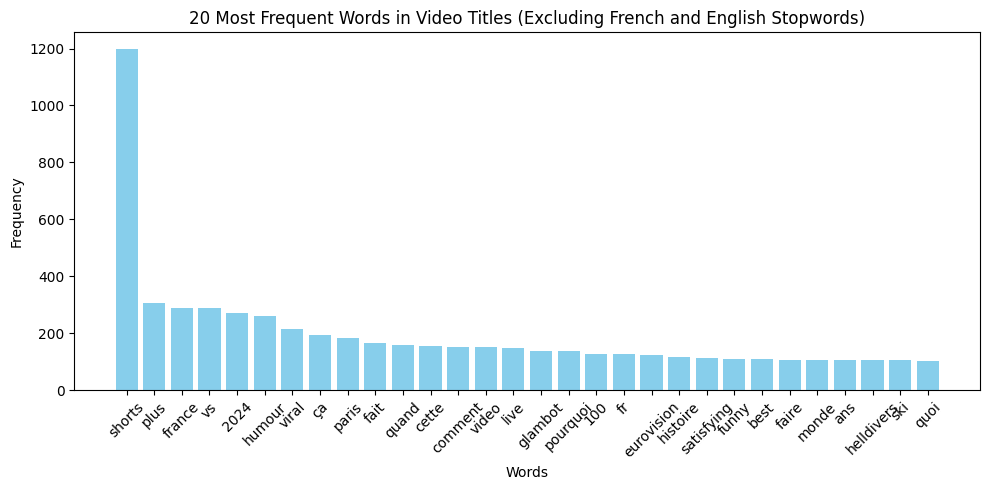

In [173]:
import re

from nltk.corpus import stopwords
import nltk
# most frequent words in the video titles

nltk.download('stopwords')
def tokenize(title):
    # Remove non-alphabetic characters and convert to lowercase
    words = re.findall(r'\b\w+\b', title.lower())
    return words

# French stopwords
french_stopwords = set(stopwords.words('french'))
english_stopwords = set(stopwords.words('english'))

combined_stopwords = french_stopwords.union(english_stopwords)

combined_stopwords_with_extra = combined_stopwords.union({'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '})

all_words = df['fulltitle'].apply(tokenize).sum()
filtered_words = [word for word in all_words if word not in combined_stopwords_with_extra]
word_counts = Counter(filtered_words)

# Get the 20 most common words
most_common_words = word_counts.most_common(30)
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('20 Most Frequent Words in Video Titles (Excluding French and English Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()